# **Import the dependencies**

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# **Data Collection and processing**

In [5]:
#loading the data from csv file to pandas dataframe

car_dataset = pd.read_csv('/content/car data.csv')

#inspecting the first 5 rowas of the data frame

car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
# checking the number of rows and columns

car_dataset.shape

(4340, 8)

In [10]:
# getting some information about the datasets

car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [12]:
# checking the number of missing values

car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [27]:
# checking the distribution of categorical data

print(car_dataset.fuel.value_counts())
print("\n")
print(car_dataset.seller_type.value_counts())
print("\n")
print(car_dataset.transmission.value_counts())
print("\n")
print(car_dataset.owner.value_counts())

fuel
1    2153
0    2123
2      40
3      23
4       1
Name: count, dtype: int64


seller_type
1    3244
0     994
2     102
Name: count, dtype: int64


transmission
0    3892
1     448
Name: count, dtype: int64


owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


# **Encoding the categorical data**

In [78]:
#create a label encoder object
le = LabelEncoder()

#Avoid 0 in encoding by adding 1 to the encoded values
#fit and transform the columns need to be encoded
car_dataset['fuel'] = le.fit_transform(x['fuel']) + 1
car_dataset['seller_type'] = le.fit_transform(x['seller_type']) + 1
car_dataset['transmission'] = le.fit_transform(x['transmission']) + 1
car_dataset['owner'] = le.fit_transform(x['owner']) + 1


#now the columns have numeric values
car_dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,2,1,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,2,1,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,2,2,1,1
3,Datsun RediGO T Option,2017,250000,46000,1,2,1,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,2,1,2
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,2,2,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,2,2,1,2
4337,Maruti 800 AC BSIII,2009,110000,83000,1,2,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,2,2,1,1


In [79]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,2,1,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,2,1,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,2,2,1,1
3,Datsun RediGO T Option,2017,250000,46000,1,2,1,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,2,1,2


# **Splitting data into training data and test data**

In [80]:
x=car_dataset.drop(['name','selling_price'],axis=1) # column drop axis = 1 , row drop axis = 0


In [81]:
x=car_dataset[['year','km_driven','fuel','seller_type','transmission','owner']]

y=car_dataset['selling_price']

In [82]:
display(x)  #features

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,1,2,1,1
1,2007,50000,1,2,1,1
2,2012,100000,2,2,1,1
3,2017,46000,1,2,1,1
4,2014,141000,2,2,1,2
...,...,...,...,...,...,...
4335,2014,80000,2,2,1,2
4336,2014,80000,2,2,1,2
4337,2009,83000,1,2,1,2
4338,2016,90000,2,2,1,1


In [83]:
display(y)  #target

,selling_price
0,60000
1,135000
2,600000
3,250000
4,450000
...,...
4335,409999
4336,409999
4337,110000
4338,865000


In [96]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1,random_state=2)

# **Preprocessing**

In [105]:
# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform training data
x_train = scaler.fit_transform(X_train)

# Show min, max, range
print("Max values:", scaler.data_max_)
print("Min values:", scaler.data_min_)
print("Ranges:", scaler.data_range_)

# Transform test data
x_test = scaler.transform(X_test)


Max values: [2.02000e+03 8.06599e+05 5.00000e+00 3.00000e+00 2.00000e+00 5.00000e+00]
Min values: [1.992e+03 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
Ranges: [2.80000e+01 8.06598e+05 4.00000e+00 2.00000e+00 1.00000e+00 4.00000e+00]


# **Model Training**

In [98]:
# loading linear regression model

linear=LinearRegression()

In [99]:
linear.fit(X_train,Y_train)

LinearRegression()

In [100]:
# Example new data
new = pd.DataFrame({
    'year': [2007],
    'km_driven':[70000],
    'fuel': [0],
    'seller_type': [0],
    'transmission': [0],
    'owner':[0]
})

# Scale new input
new_scaled = scaler.transform(new)

# Predict
prediction = linear.predict(new_scaled)
print("Predicted Charges:", prediction)


Predicted Charges: [-82015261.86845905]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [112]:
train_pred=linear.predict(X_test)

# **Model Evaluation**

In [116]:
# R squared error

error_score=metrics.r2_score(Y_test,train_pred)

print(error_score)

0.5027999353753423


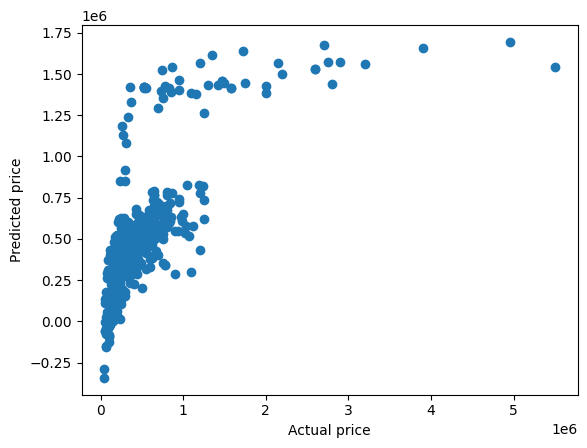

In [121]:
plt.scatter(Y_test,train_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()